# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.09000000171363354
Score (max over agents) from episode 2: 0.09000000171363354
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


In [1]:
from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 4. Setting up the Agent

We will set up an MADDPG agent:

In [2]:
from maddpg import MADDPG_Agent
num_agents = 2
agent = MADDPG_Agent(state_size, action_size, num_agents)

In case there is already a weight file available from previous training runs, then we can load it via this function call:

In [ ]:
filename_root = 'checkpoint'
agent.load_weights(filename_root)

### 5. Training
In case no agent weights have been loaded, we need to train our agent.

In [ ]:
from collections import deque
import time
            
def maddpg(n_episodes=6000):
    """DDPG for solving reacher environment.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores = []                         # List containing scores from each episode
    moving_avgs = []
    WINDOW_SIZE=100
    scores_window = deque(maxlen=WINDOW_SIZE)   # Last 100 scores
    best_score = -np.inf       # For the absolute max value ever reached
    THRESH_SOLVED = 0.5
    solved = False                      # To keep track whether we already solved the environment
    aggregate_output = WINDOW_SIZE       # Number of episodes to display in one changing line
    
    NOISE_START = 4               # Scaling factor for noise at start 
    NOISE_END = 0                 # Scaling factor for noise in the end
    NOISE_PER_PERIOD = 1000       # Decrease noise over so many periods

    BETA_START = 0                  # If using PER (can be changed in ddpg.py): correction factor at start
    BETA_END = 1                    # If using PER (can be changed in ddpg.py): correction factor at the end
    BETA_PER_PERIOD = n_episodes    # Increase beta over the whole course of the simulation
    
    beta_schedule = \
        lambda episode: min(BETA_END, BETA_START + episode * (BETA_END - BETA_START)/BETA_PER_PERIOD)
    noise_schedule = \
        lambda episode: max(NOISE_END, NOISE_START - episode * (NOISE_START - NOISE_END)/NOISE_PER_PERIOD)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # Reset the environment to train mode
        state = env_info.vector_observations               # Get initial state
        score = np.zeros(num_agents)                      # Reset scores
        noise_cur = noise_schedule(i_episode)                       # Reduce noise
        beta_cur = beta_schedule(i_episode)                         # Increase beta
        if (i_episode - 1) % aggregate_output == 0:
            start_time = time.time()
        
        while True: 
            actions = agent.act(state, noise=noise_cur)                 # Get action from actor
            
            env_info = env.step(actions)[brain_name]       # Send action to the environment
            next_state = env_info.vector_observations      # Get the next state, ...
            reward = env_info.rewards                      # ..., reward ...
            done = env_info.local_done                     # ..., and whether the episode has finished
            # Take one step, learn new weights via soft update
            agent.step(state, actions, reward, next_state, done, beta_cur) 
            state = next_state                             # Progress states 
            score += reward                                # Update score
            
            if np.any(done):
                break
        duration = time.time() - start_time
        scores.append(max(score))                               # Save most recent score
        scores_window.append(scores[-1])                        # Save most recent score
        if max(score)>best_score and max(score)>THRESH_SOLVED:
            print(f"\nNew highscore: \t{scores[-1]}")
            best_score = scores[-1]
        moving_avgs.append(np.mean(scores_window))
        
        # Display some progress
        print(f"\rEpisode {i_episode} ({duration:.1f}s)"\
              f"\tAverage Max Score: {moving_avgs[-1]:.2f}, All-time best: {best_score:.2f}", end="")
        if i_episode% aggregate_output == 0:
            print(f"\rEpisode {i_episode} ({duration:.1f}s)"\
                  f"\tAverage Max Score: {moving_avgs[-1]:.2f}, All-time best: {best_score:.2f}")
        
        # Only print "solved" if target score reached for the first time
        if moving_avgs[-1] >= THRESH_SOLVED and i_episode>= WINDOW_SIZE and not solved:    
            print(f"\nEnvironment solved in {i_episode - WINDOW_SIZE:d} episodes!"\
                  f"\tAverage Max Score: {moving_avgs[-1]:.2f}, All-time best: {best_score:.2f}")
            solved = True
            # Give the user the possibility to cancel further training
            answer = input("Should I continue training? [Y/n]")  
            if answer.lower()=='n':
                break
    return scores, moving_avgs


# Train agent and keep track of the scores
if 'scores' in locals():
    # Append if scores already exist, adjust epsilon to final value
    new_scores, new_moving_avgs = maddpg(n_episodes=100) 
    scores.append(new_scores)
    moving_avgs.append(new_moving_avgs)
else: 
    # No scores have been generated, so start training all over, again
    scores, moving_avgs = maddpg()

Episode 100 (92.5s)	Average Max Score: 0.01, All-time best: -inf
Episode 116 (14.7s)	Average Max Score: 0.01, All-time best: -inf

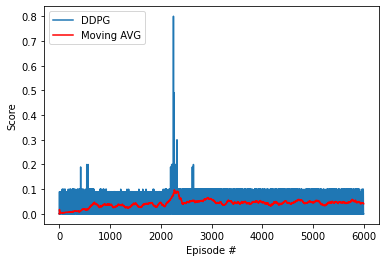

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.plot(np.arange(len(scores)), moving_avgs, c='r', label='Moving AVG')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

In [16]:
for i in range(5):
    print(f"\r{i}", end="")

4

When finished, we should close the environment.

In [4]:
env.close()